In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
sigma_y = 0.75

def func(x):
    return x * np.sin(x)
                           
X = np.linspace(start=2, stop=8, num=1_000).reshape(-1, 1)
rng = np.random.RandomState(1)
y = np.squeeze(func(X)) + rng.normal(loc=0.0, scale=sigma_y, size=(1_000,))
test_X = np.linspace(start=0, stop=10, num=100).reshape(-1, 1)
test_y = np.squeeze(func(test_X))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


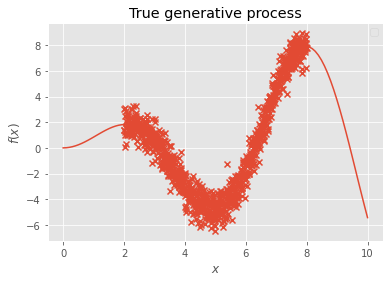

In [3]:
plt.scatter(X, y, marker='x')
plt.plot(test_X, test_y)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [4]:
X_train, y_train = X, y

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=sigma_y**2, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

4.78**2 * RBF(length_scale=1.63)

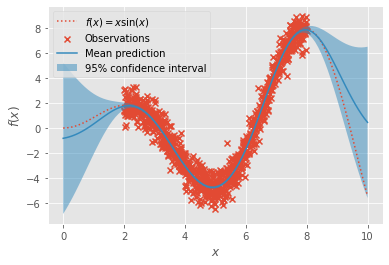

In [6]:
mean_prediction, std_prediction = gaussian_process.predict(test_X, return_std=True)

plt.plot(test_X, test_y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, marker='x', label="Observations")
plt.plot(test_X, mean_prediction, label="Mean prediction")
plt.fill_between(
    test_X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.savefig("figures/1d_noisy_demo.pdf", bbox_inches='tight')

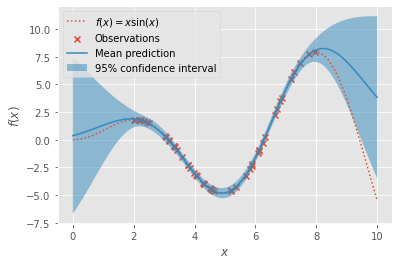

In [7]:
noiseless_y = np.squeeze(func(X))
training_indices = rng.choice(np.arange(noiseless_y.size), size=50, replace=False)
X_train, y_train = X[training_indices], noiseless_y[training_indices]

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=sigma_y**2, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)

mean_prediction, std_prediction = gaussian_process.predict(test_X, return_std=True)

plt.plot(test_X, test_y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, marker='x', label="Observations")
plt.plot(test_X, mean_prediction, label="Mean prediction")
plt.fill_between(
    test_X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.savefig("figures/1d_noisefree_demo.pdf", bbox_inches='tight')

2022-08-15 15:12:19.402008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /vol/lab/mac/cadence/smv/lib


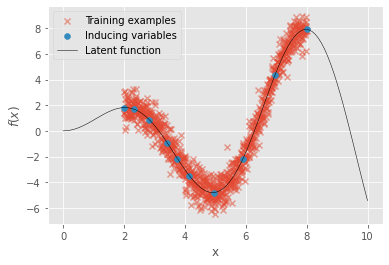

In [8]:
from snngp_inference import select_inducing_points
from models import FCN

X_m, indices = select_inducing_points("greedy", X, 10, FCN, np.array([1, 1]), dict(
            kernel_batch_size=0, 
            device_count=-1, 
            num_layers=2,
            hid_dim=1, 
            out_dim=1
            ))

plt.scatter(X, y, label='Training examples', marker='x', alpha=0.5)
plt.scatter(X_m, func(X_m), label='Inducing variables')
plt.plot(test_X, test_y, label='Latent function', c='k', lw=0.5)
plt.xlabel('x')
plt.ylabel("$f(x)$")
plt.legend()
plt.savefig("figures/1d_demo_snngp_1-1.pdf", bbox_inches='tight')

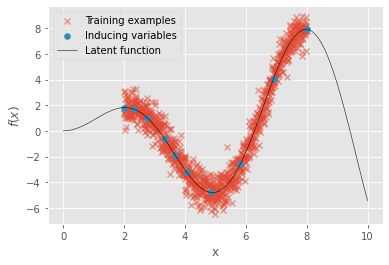

In [9]:
X_m, indices = select_inducing_points("greedy", X, 10, FCN, np.array([10, 10]), dict(
            kernel_batch_size=0, 
            device_count=-1, 
            num_layers=2,
            hid_dim=1, 
            out_dim=1
            ))

plt.scatter(X, y, label='Training examples', marker='x', alpha=0.5)
plt.scatter(X_m, func(X_m), label='Inducing variables')
plt.plot(test_X, test_y, label='Latent function', c='k', lw=0.5)
plt.xlabel('x')
plt.ylabel("$f(x)$")
plt.legend()
plt.savefig("figures/1d_demo_snngp_10-10.pdf", bbox_inches='tight')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys


In [ ]:
n = 60000
np.save("/vol/bitbucket/yn621/data/test_matrix", np.random.rand(n, n) + 1e-6*np.eye(n))

In [2]:
a = np.load("/vol/bitbucket/yn621/data/A.npy")
a_inv = np.linalg.inv(a)
a_inv

array([[-0.09020955, -0.22109512,  0.26291266, ..., -0.11110753,
         0.07204168, -0.3289036 ],
       [-0.20976059, -0.02538575, -0.04167892, ..., -0.03284566,
         0.17137122,  0.06009776],
       [-0.2241322 , -0.23572665,  0.188949  , ..., -0.28381178,
         0.13175931, -0.20891424],
       ...,
       [-0.12078058, -0.03481387,  0.00794338, ..., -0.12047622,
        -0.02970137,  0.12196825],
       [ 0.09275537,  0.10602363, -0.08605352, ...,  0.10283179,
        -0.03148009,  0.03573807],
       [-0.27229974, -0.22963308,  0.18981051, ..., -0.02052971,
         0.24222022, -0.18052633]])

In [2]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""

    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols)
                 .swapaxes(1, 2)
                 .reshape(-1, nrows, ncols))

def schur_inverse(matrix, recursion=1):
    A, B, C, D = split(matrix, matrix.shape[0]//2, matrix.shape[0]//2)
    if recursion <= 1:
        D_inv = np.linalg.inv(D)
        tmp = A - B @ D_inv @ C
        upperleft = np.linalg.inv(tmp)
        upperright = -upperleft @ B @ D_inv
        lowerleft = -D_inv @ C @ upperleft
        lowerright = D_inv + D_inv @ C @ upperleft @ B @ D_inv
        matrix_inverse = np.vstack([np.hstack([upperleft, upperright]), np.hstack([lowerleft, lowerright])])
        return matrix_inverse
    else:
        D_inv = schur_inverse(D, recursion-1)
        upperleft = schur_inverse(A - B @ D_inv @ C, recursion-1)
        upperright = -upperleft @ B @ D_inv
        lowerleft = -D_inv @ C @ upperleft
        lowerright = D_inv + D_inv @ C @ upperleft @ B @ D_inv
        matrix_inverse = np.vstack([np.hstack([upperleft, upperright]), np.hstack([lowerleft, lowerright])])
        return matrix_inverse

a = np.load("/vol/bitbucket/yn621/data/test_matrix.npy")
A, B, C, D = split(a, a.shape[0]//2, a.shape[0]//2)
np.save("/vol/bitbucket/yn621/data/A", A)
np.save("/vol/bitbucket/yn621/data/B", B)
np.save("/vol/bitbucket/yn621/data/C", C)
np.save("/vol/bitbucket/yn621/data/D", D)

In [3]:
D_inv = np.linalg.inv(D)
tmp = A - B @ D_inv @ C
upperleft = np.linalg.inv(tmp)
upperright = -upperleft @ B @ D_inv
lowerleft = -D_inv @ C @ upperleft
lowerright = D_inv + D_inv @ C @ upperleft @ B @ D_inv
matrix_inverse = np.vstack([np.hstack([upperleft, upperright]), np.hstack([lowerleft, lowerright])])

In [4]:
a_inv_ = schur_inverse(np.load("/vol/bitbucket/yn621/data/A.npy"), recursion=2)
np.save("/vol/bitbucket/yn621/data/A_inv", a_inv_)
a_inv_

: 

: 

In [13]:
a = np.load("/vol/bitbucket/yn621/data/A.npy")
a_inv = np.load("/vol/bitbucket/yn621/data/A_inv.npy")
np.allclose(a @ a_inv, np.eye(n)), a @ a_inv

(False,
 array([[ 1.00000000e+00,  5.32933697e-11, -5.25250954e-11, ...,
          9.09007980e-10,  2.26707453e-09,  1.00568776e-10],
        [ 3.35205641e-10,  1.00000000e+00, -1.00668807e-10, ...,
         -3.40765283e-09, -5.27978816e-09,  2.50524401e-09],
        [ 5.37259126e-12,  7.75255415e-11,  1.00000000e+00, ...,
          1.98228900e-09,  3.42967255e-09,  1.18787258e-10],
        ...,
        [-1.13296039e-11, -7.99493804e-12,  5.52713431e-12, ...,
          1.00000000e+00, -3.91242594e-13, -3.21207505e-11],
        [ 3.26432215e-11,  4.20747881e-11, -3.73341358e-11, ...,
          2.21449525e-11,  1.00000000e+00,  3.78281850e-11],
        [ 4.81286122e-11,  6.17332852e-11, -5.67212943e-11, ...,
          3.76934040e-11, -2.26263452e-11,  1.00000000e+00]]))

In [15]:
notclose_a = np.invert(np.isclose(a @ a_inv, np.eye(n)))
a_inv_[notclose_a], a_inv[notclose_a]

(array([-0.0986222 ,  0.00212473, -0.11152598, ..., -0.09891608,
         0.39135449, -0.27590702]),
 array([-0.0986222 ,  0.00212473, -0.11152598, ..., -0.09891608,
         0.39135449, -0.27590702]))

In [ ]:
A, B, C, D = split(a, a.shape[0]//2, a.shape[0]//2)
A_inv = np.linalg.inv(A)
tmp = D - C @ A_inv @ B
lowerright = np.linalg.inv(tmp)
# print(upperleft)
lowerleft = -lowerright @ C @ A_inv
# print(upperright)
upperright = -A_inv @ B @ lowerright
# print(lowerleft)
upperleft = A_inv + A_inv @ B @ lowerright @ C @ A_inv
# print(lowerright)
a_inv_ = np.vstack([np.hstack([upperleft, upperright]), np.hstack([lowerleft, lowerright])])
a_inv_

In [22]:
np.isclose(a_inv_, a_inv), np.allclose(a_inv_, a_inv)

(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 False)

In [23]:
notclose_a = np.invert(np.isclose(a_inv_, a_inv))
a_inv_[notclose_a], a_inv[notclose_a]

(array([-3.52725259e+00, -6.63135326e+00,  1.52723154e+01,  2.81159202e+00,
        -1.65303753e+01,  8.80006712e+00, -3.87744407e-01,  2.44073149e-02,
         1.69754510e+00, -2.67731389e-01,  3.28761363e+00,  2.04745555e+00,
        -7.08383388e-01,  6.79036105e-02,  1.01734558e+01, -1.91441729e+00,
         4.93707213e+00,  1.82726167e+00,  1.32929931e-01, -1.33760156e+01,
         3.04675823e+00,  7.39008897e-01,  9.60577548e+00,  1.42137744e+01,
        -3.52192980e-02,  8.08760669e+00,  7.41074646e+00,  3.10605972e+00,
        -8.19674254e-01, -1.90196136e+01, -9.33467013e+00, -1.27652568e+00,
         8.08757335e+00, -2.47742028e+00,  2.99230390e+00, -9.48403394e+00,
         2.66835896e-02, -6.92005818e-01,  1.21214561e+00, -5.41347371e-01,
        -1.49219151e+00,  4.26247148e+00, -2.78493753e+00, -6.46746745e+00,
        -2.27658250e-01, -3.56685868e+00, -4.53126850e+00,  9.86229828e+00,
        -2.02783464e+01, -1.53051648e+00, -1.62829555e+00, -2.42258180e+00,
        -5.8